In [31]:
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv(r'finviz_3_22_2020.csv')

In [33]:
df.columns

Index(['No.', 'Ticker', 'Company', 'Sector', 'Industry', 'Country',
       'Market Cap', 'P/E', 'Forward P/E', 'PEG', 'P/S', 'P/B', 'P/Cash',
       'P/Free Cash Flow', 'Dividend Yield', 'Payout Ratio', 'EPS (ttm)',
       'EPS growth this year', 'EPS growth next year',
       'EPS growth past 5 years', 'EPS growth next 5 years',
       'Sales growth past 5 years', 'EPS growth quarter over quarter',
       'Sales growth quarter over quarter', 'Shares Outstanding',
       'Shares Float', 'Insider Ownership', 'Insider Transactions',
       'Institutional Ownership', 'Institutional Transactions', 'Float Short',
       'Short Ratio', 'Return on Assets', 'Return on Equity',
       'Return on Investment', 'Current Ratio', 'Quick Ratio',
       'LT Debt/Equity', 'Total Debt/Equity', 'Gross Margin',
       'Operating Margin', 'Profit Margin', 'Performance (Week)',
       'Performance (Month)', 'Performance (Quarter)',
       'Performance (Half Year)', 'Performance (Year)', 'Performance (YTD)',

In [34]:
df.shape

(7744, 71)

In [35]:
df['YTD'] = df['Performance (YTD)'].apply(lambda x: float(str(x).strip('%'))/100)

In [36]:
df['Sector'].unique()

array(['Technology', 'Utilities', 'Industrial Goods', 'Consumer Goods',
       'Services', 'Basic Materials', 'Financial', 'Healthcare',
       'Conglomerates'], dtype=object)

In [37]:
healthcare = df[df['Sector'] == 'Healthcare']

In [38]:
materials = df[df['Sector'] == 'Basic Materials']

In [39]:
financials = df[df['Sector'] == 'Financial']

In [40]:
services = df[df['Sector'] == 'Services']

In [51]:
for i in services['Company']:
    print (i)

U.S. Xpress Enterprises, Inc.
AutoWeb, Inc.
Knight-Swift Transportation Holdings Inc.
Werner Enterprises, Inc.
Landstar System, Inc.
USA Truck, Inc.
ArcBest Corporation
Patriot Transportation Holding, Inc.
Heartland Express, Inc.
Schneider National, Inc.
Echo Global Logistics, Inc.
Covenant Transportation Group, Inc.
YRC Worldwide Inc.
J.B. Hunt Transport Services, Inc.
Daseke, Inc.
Saia, Inc.
Universal Logistics Holdings, Inc.
Marten Transport, Ltd.
P.A.M. Transportation Services, Inc.
Old Dominion Freight Line, Inc.
TFI International Inc.
Build-A-Bear Workshop, Inc.
KBR, Inc.
NV5 Global, Inc.
Tetra Tech, Inc.
Ameresco, Inc.
AECOM
ENGlobal Corporation
Jacobs Engineering Group Inc.
Willdan Group, Inc.
Grana y Montero S.A.A.
VSE Corporation
Baker Hughes Company
Paychex, Inc.
ASGN Incorporated
HireQuest, Inc.
Heidrick & Struggles International, Inc.
DLH Holdings Corp.
Resources Connection, Inc.
Mastech Digital, Inc.
HeadHunter Group PLC
Cross Country Healthcare, Inc.
ManpowerGroup Inc.
S

In [41]:
technology = df[df['Sector'] == 'Technology']

In [42]:
industrials = df[df['Sector'] == 'Industrial Goods']

In [43]:
consumer = df[df['Sector'] == 'Consumer Goods']

In [44]:
utilities = df[df['Sector'] == 'Utilities']

In [45]:
df = services

# Step 1: State the Null & Alternative Hypotheses

### High indebted services sector company year to date returns equal low indebted services sector company year to date returns

$$H_0: \mu_1-\mu_2=0$$

### High indebted services sector company year to date returns do not equal low indebted services sector company year to date returns


$$H_a: \mu_1-\mu_2\neq0$$

# Step 2: Identify the Test Statistic & Probability Distribution

$$t = \frac{(\bar{x_1} - \bar{x_2})- (\mu_1 - \mu_2)}{(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2})^\frac{1}{2}}$$

$$s_p^2 = \frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}$$

In [16]:
n_1 = df[(df['Total Debt/Equity'] >= 1) & (df['Market Cap'] >= 100)].shape[0]
n_1

198

In [17]:
n_2 = df[(df['Total Debt/Equity'] < 1) & (df['Market Cap'] >= 100)].shape[0]
n_2

306

In [18]:
dof = n_1 + n_2 -2
dof

502

# Step 3: Specify the Decision Rule

In [19]:
from scipy import stats 
stats.t.isf(0.025, dof)

1.964700844883014

# Step 4: Now Collect Data & Calculate Test Statistic

In [20]:
high_debt_df = df[(df['Total Debt/Equity'] >= 1) & (df['Market Cap'] >= 100)]

In [21]:
low_debt_df = df[(df['Total Debt/Equity'] < 1) & (df['Market Cap'] >= 100)]

In [22]:
high_debt_df['YTD']

66     -0.4016
82     -0.3956
84     -0.6101
171    -0.4224
235    -0.3179
         ...  
7666   -0.4895
7668   -0.2655
7669   -0.2400
7730   -0.4580
7731   -0.3889
Name: YTD, Length: 198, dtype: float64

In [23]:
low_debt_df['YTD']

68     -0.1529
69     -0.1149
70     -0.1711
72     -0.3011
74     -0.2052
         ...  
7664   -0.1827
7667   -0.3826
7671   -0.1663
7672   -0.3932
7673    0.0574
Name: YTD, Length: 306, dtype: float64

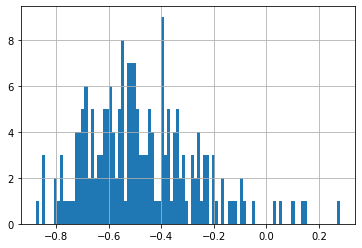

In [24]:
high_debt_df['YTD'].hist(bins=100)

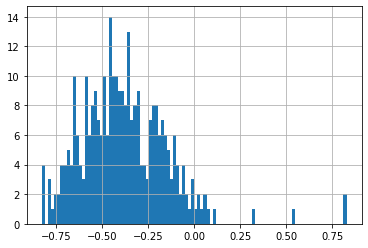

In [25]:
low_debt_df['YTD'].hist(bins=100)

In [26]:
x_1 = high_debt_df['YTD'].mean()
x_1

-0.4775712121212121

In [27]:
x_2 = low_debt_df['YTD'].mean()
x_2

-0.38118496732026147

In [28]:
s_1 = high_debt_df['YTD'].var()
s_1

0.04238035099446239

In [29]:
s_2 = low_debt_df['YTD'].var()
s_2

0.054542687248687445

In [30]:
stats.ttest_ind(high_debt_df['YTD'], low_debt_df['YTD'], equal_var=True, nan_policy='omit')

Ttest_indResult(statistic=-4.737072955410869, pvalue=2.8263025816613797e-06)